<a href="https://colab.research.google.com/github/Evgenius87/Data_Science_hw/blob/main/Hw_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

Порівняйте результати та зробіть висновки.

Завантаження відкритих даних:

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, SimpleRNN, Bidirectional

Встановлюємо гіперпараметри:

In [2]:
max_features = 10000  # кількість слів, що розглядаються як особливості
max_len = 500  # обмеження кількості слів в тексті
batch_size = 32

Завантаження даних:

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

17464789/17464789 [==============================] - 0s 0us/step


Передпроцесинг послідовних даних:

In [4]:
input_train = pad_sequences(input_train, maxlen=max_len)
input_test = pad_sequences(input_test, maxlen=max_len)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

Побудова моделі LSTM:

In [5]:
# Створення та тренування різних рекурентних моделей
models = []

# Модель з простим RNN
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
model_rnn.add(SimpleRNN(128))
model_rnn.add(Dense(1, activation='sigmoid'))
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models.append(('RNN', model_rnn))

# Модель з LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models.append(('LSTM', model_lstm))

# Модель з Bidirectional LSTM
model_bidirectional = Sequential()
model_bidirectional.add(Embedding(input_dim=max_features, output_dim=128, input_length=max_len))
model_bidirectional.add(Bidirectional(LSTM(128)))
model_bidirectional.add(Dense(1, activation='sigmoid'))
model_bidirectional.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
models.append(('Bidirectional LSTM', model_bidirectional))

In [6]:
# Тренування та оцінка моделей
results = []

for name, model in models:
    print(f'Training {name}...')
    history = model.fit(input_train, y_train, epochs=5, batch_size=batch_size, validation_data=(input_test, y_test))
    loss, accuracy = model.evaluate(input_test, y_test)
    results.append((name, history, loss, accuracy))

Training RNN...
Epoch 1/5
782/782 [==============================] - 443s 562ms/step - loss: 0.6132 - accuracy: 0.6593 - val_loss: 0.4695 - val_accuracy: 0.7931
Epoch 2/5
782/782 [==============================] - 410s 524ms/step - loss: 0.4749 - accuracy: 0.7792 - val_loss: 0.5433 - val_accuracy: 0.7252
Epoch 3/5
782/782 [==============================] - 397s 507ms/step - loss: 0.4880 - accuracy: 0.7553 - val_loss: 0.5448 - val_accuracy: 0.7350
Epoch 4/5
782/782 [==============================] - 386s 494ms/step - loss: 0.4823 - accuracy: 0.7552 - val_loss: 0.6420 - val_accuracy: 0.6073
Epoch 5/5
782/782 [==============================] - 31s 40ms/step - loss: 0.5352 - accuracy: 0.7597
Training LSTM...
Epoch 1/5
782/782 [==============================] - 68s 84ms/step - loss: 0.5200 - accuracy: 0.7437 - val_loss: 0.4260 - val_accuracy: 0.8255
Epoch 2/5
782/782 [==============================] - 33s 43ms/step - loss: 0.4625 - accuracy: 0.7844 - val_loss: 0.3598 - val_accuracy: 0.8459


Відображення результатів:

In [7]:
# Виведення результатів
for name, history, loss, accuracy in results:
    print(f'{name} accuracy: {accuracy * 100:.2f}%')

RNN accuracy: 75.97%
LSTM accuracy: 87.32%
Bidirectional LSTM accuracy: 87.35%


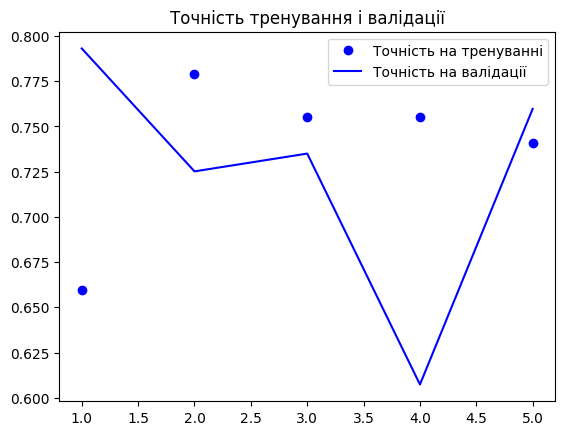

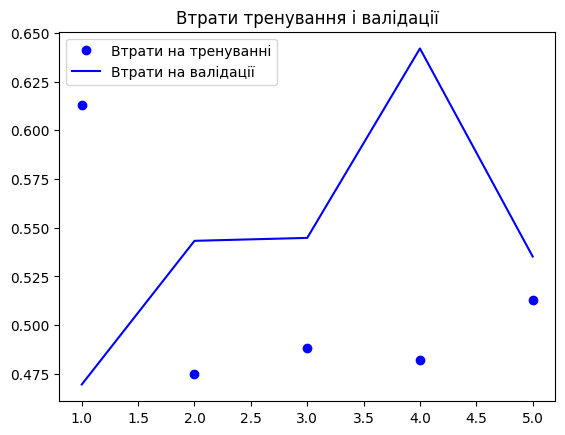

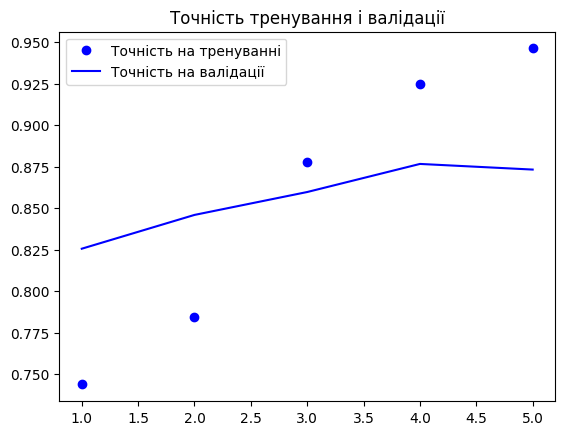

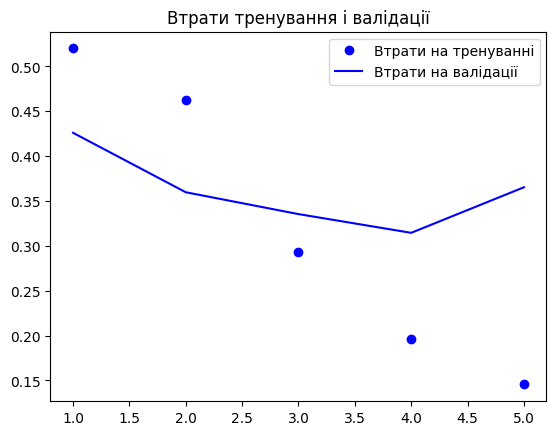

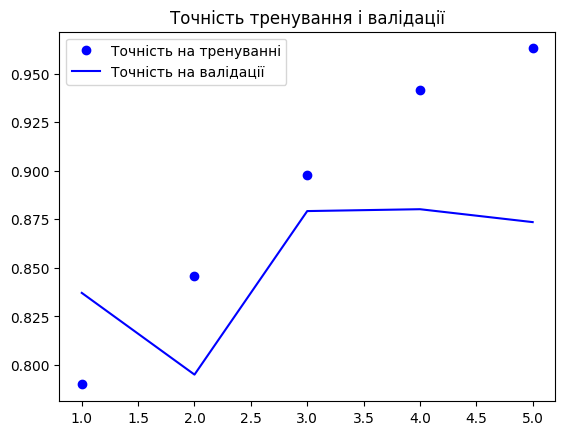

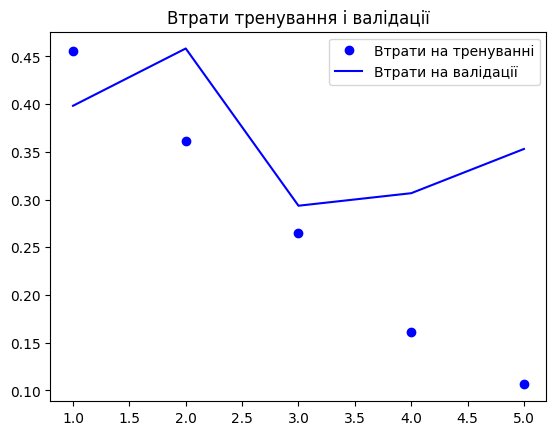

In [8]:
for name, history, _, _ in results:
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  plt.plot(epochs, acc, 'bo', label='Точність на тренуванні')  # Графік точності на тренувальних данних
  plt.plot(epochs, val_acc, 'b', label='Точність на валідації')  # Графік точності на валідаційних данних
  plt.title('Точність тренування і валідації')  # Заголовок графіку
  plt.legend()  # Показати легенду

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Втрати на тренуванні')  # Графік втрат на тренувальних данних
  plt.plot(epochs, val_loss, 'b', label='Втрати на валідації')  # Графік втрат на валідаційних данних
  plt.title('Втрати тренування і валідації')  # Заголовок графіку
  plt.legend()  # Показати легенду

  plt.show()  # Відобразити графіки

Прогнозування з використанням навченої моделі:

In [9]:
for model_info in models:
    model_name = model_info[0]
    model = model_info[1]

    # Отримання прогнозів для моделі
    predictions = model.predict(input_test)

    # Перетворення прогнозів в бінарний формат
    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

    print(f"Модель: {model_name}")

    # Виведення деяких прогнозованих значень поряд з фактичними значеннями
    for i in range(10):
        print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

    # Оцінка моделі
    test_loss, test_acc = model.evaluate(input_test, y_test, batch_size=64)
    print(f'Test Loss для {model_name}: {test_loss}')
    print(f'Test Accuracy для {model_name}: {test_acc * 100:.2f}%')

782/782 [==============================] - 30s 38ms/step
Модель: RNN
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
391/391 [==============================] - 15s 39ms/step - loss: 0.5352 - accuracy: 0.7597
Test Loss для RNN: 0.5352137088775635
Test Accuracy для RNN: 75.97%
782/782 [==============================] - 7s 8ms/step
Модель: LSTM
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
391/391 [==============================] - 4s 10ms/step - loss: 0.3653 - accuracy: 0.8732
Test Loss для LSTM: 0.365297585725